# Анализ сентимента Пульса и Телеграма

0) Обучающая выборка

I*. Выполняем предобработку текста

II. Пробуем разные алгоритмы для классификации

III*. Получение тикеров сообщений

IV*. Анализ сентимента тг

V*. Анализ сообщений из Пульса

.* обозначены обязательные разделы

# 0. Добавляем размеченные сообщения с обучающей выборкой

In [31]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
df = pd.read_csv('Labeled sentiment data.xlsx - Sheet1.csv')
df

,text,label,count,dtype
0,И где хранить?)) А контракты бы купил где-нибу...,2,11,train
1,"А, кстати, про втб. У меня мысль последнее вре...",2,30,train
2,Очень приятно слышать человека именно тем сост...,2,56,train
3,покупаем покупаем страшно недооценен . дивоход...,3,12,train
4,весьма интересно посмотреть постаукцион,2,6,train
...,...,...,...,...
32571,"пропал, дела",2,2,train
32572,Юр ... наши дела идут плохо ... боюсь мы скоро...,2,48,test
32573,УДС – уровень достаточности средств Стоимость ...,2,17,train
32574,Откуда ушли позавчера - туда пришли обратно......,2,25,train


In [32]:
df['text'] = df['text'].astype('str')

In [33]:
# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')

# # Define a function for text preprocessing
# def preprocess_text(text):
#     tokens = word_tokenize(text, language='russian')  # Tokenization
#     stop_words = set(stopwords.words('russian'))  # Load stopwords
#     filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]  # Remove stopwords
#     return filtered_tokens

# # Define a function for feature extraction
# def extract_features(text):
#     features = {}
#     for word in text:
#         features[word] = True
#     return features


# # Preprocess the messages in the dataframe
# df['Preprocessed_Text'] = df['text'].apply(preprocess_text)

# # Extract features from preprocessed messages
# df['Features'] = df['Preprocessed_Text'].apply(extract_features)

In [34]:
# from sklearn.metrics import precision_score, recall_score, r2_score, accuracy_score
# def confusion_matrix(actual_labels, predicted_labels):
#     # Compute confusion matrix
#     cm = confusion_matrix(actual_labels, predicted_labels)

#     # Define class labels
#     classes = ['1', '2', '3']

#     # Create a confusion matrix plot using seaborn
#     ax = plt.subplot()
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

#     # Set labels, title, and ticks
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('Actual')
#     ax.set_title('Confusion Matrix')
#     ax.xaxis.set_ticklabels(classes)
#     ax.yaxis.set_ticklabels(classes)

#     plt.show()
    
# def prec_recall(test, true):
    
#     # Calculate precision
#     precision = precision_score(test_set['label'], test_set['Predicted_Sentiment'], average='macro')

#     # Calculate recall
#     recall = recall_score(test_set['label'], test_set['Predicted_Sentiment'], average='macro')

#     r2_score = accuracy_score(test_set['label'], test_set['Predicted_Sentiment'])

#     # Print precision and recall
#     print("Precision: ", precision)
#     print("Recall: ", recall)
#     print(r2_score)

In [35]:
# # БАЕС
# # Split into training and testing sets
# train_set = df[df['dtype'] == 'train']
# test_set = df[df['dtype'] == 'test']

# # Train a Naive Bayes classifier
# classifier = NaiveBayesClassifier.train(zip(train_set['Features'], train_set['label']))

# # Classify the messages in the test set
# test_set['Predicted_Sentiment'] = test_set['Features'].apply(lambda x: classifier.classify(x))

# # Display the test set with predicted sentiments
# test_set[['text', 'label', 'Predicted_Sentiment']]

In [36]:
# # РЕЗЫ БАЕСА
# from sklearn.metrics import precision_score, recall_score, r2_score, accuracy_score

# # Calculate precision
# precision = precision_score(test_set['label'], test_set['Predicted_Sentiment'], average='macro')

# # Calculate recall
# recall = recall_score(test_set['label'], test_set['Predicted_Sentiment'], average='macro')

# r2_score = accuracy_score(test_set['label'], test_set['Predicted_Sentiment'])

# # Print precision and recall
# print("Precision: ", precision)
# print("Recall: ", recall)
# print(r2_score)

# I. Выполняем предобработку текста

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from functools import lru_cache
import string
nltk.download('wordnet')
nltk.download('omw-1.4')

import pymorphy2
def preprocess_text(text):
    tokens = word_tokenize(text, language='russian')  # Tokenization
    stop_words = set(stopwords.words('russian'))  # Load stopwords
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize text into words
    tokens = word_tokenize(text, language='russian')
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    
    # filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]  # Remove stopwords
    #return filtered_tokens
    return tokens
#df['text'] = df['text'].astype(str)
# Split the data into features (preprocessed text) and labels (sentiments)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Матвей\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Матвей\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [38]:
df['text'] = df['text'].astype('str')
df['Preprocessed_Text'] = df['text'].apply(preprocess_text)

# II. Пробуем разные алгоритмы для классификации

In [39]:
features = df['Preprocessed_Text']
labels = df['label']

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

features_str = [' '.join(tokens) for tokens in features]
# Apply TF-IDF vectorization to the features
X = vectorizer.fit_transform(features_str)

train_X, test_X, train_y, test_y = train_test_split(X, labels, test_size=0.3, random_state=42)

In [40]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# # Define the dictionary of classification models
# classification_models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'SVM': SVC(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Random Forest': RandomForestClassifier()
# }

# # Assuming X_train and y_train are your training data features and labels

# # Iterate through the classification models
# for model_name, model in classification_models.items():
#     print("Training model:", model_name)
#     model.fit(train_X, train_y)

#     # Assuming X_test is your test data
#     predictions = model.predict(test_X)
    
#     # Calculate precision
#     precision = precision_score(test_y, predictions, average='macro')
#     # Calculate recall
#     recall = recall_score(test_y, predictions, average='macro')
#     r2_score = accuracy_score(test_y, predictions)

#     # Print precision and recall
#     print("Precision: ", precision)
#     print("Recall: ", recall)
#     print(r2_score)

## II.I. Подбираем гиперпараметры для Random Forest Classifier

In [41]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
# from sklearn.datasets import load_iris
# from sklearn.metrics import accuracy_score, f1_score

# #skf = StratifiedKFold(n_splits=3)

# # Random Forest Classifier
# rfc = RandomForestClassifier()

# # Define the grid of hyperparameters
# param_grid = { 
#     'n_estimators': [200, 500, 900],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth' : [4, 5, 6, 7,8,9],
#     #'criterion' :['gini', 'entropy']
# }

# # Set up GridSearchCV with 5-fold cross validation
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, n_jobs=-1, scoring='precision', verbose=10)

# # Fit the model to the training data
# CV_rfc.fit(train_X, train_y)

# # Print the best hyperparameters
# print("Best parameters: ", CV_rfc.best_params_)

# # Predict on the test data
# y_pred = CV_rfc.predict(test_X)

# # Print the accuracy score
# #print("f1-score: ", f1_score(test_y, y_pred))
# #print("precision: ", precision(test_y, y_pred))
# #print("recakk: ", recall(test_y, y_pred))

# cv_results_df = pd.DataFrame(CV_rfc.cv_results_)
# cv_results_df

In [42]:
# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(train_X, train_y)

# Predict the labels for the test set
predictions = classifier.predict(test_X)

[[ 183  985   43]
 [ 144 7024  119]
 [  46 1094  135]]


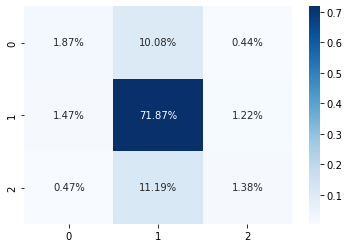

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
cf_matrix = confusion_matrix(test_y, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
print(cf_matrix)

In [44]:
np.unique(test_y, return_counts=True)

(array([1, 2, 3], dtype=int64), array([1211, 7287, 1275], dtype=int64))

In [45]:
np.unique(predictions, return_counts=True)

(array([1, 2, 3], dtype=int64), array([ 373, 9103,  297], dtype=int64))

In [46]:
from sklearn.metrics import precision_score, recall_score, r2_score, accuracy_score

# Calculate precision
precision = precision_score(test_y,predictions, average='macro')

# Calculate recall
recall = recall_score(test_y, predictions, average='macro')

r2_score = accuracy_score(test_y, predictions)

# Print precision and recall
print("Precision: ", precision)
print("Recall: ", recall)
print(r2_score)

Precision:  0.5722586100789792
Recall:  0.4069684880054425
0.7512534533919983


## II.II. Пробуем Cat Boost

In [47]:
import catboost as cb
# Initialize the CatBoost classifier
model = cb.CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass')

# Fit the model to the training data
model.fit(train_X, train_y, verbose=False)

# Make predictions on the testing data
y_pred = model.predict(test_X)

# Calculate precision
precision = precision_score(test_y,y_pred, average='macro')

# Calculate recall
recall = recall_score(test_y, y_pred, average='macro')

r2_score = accuracy_score(test_y, y_pred)

# Print precision and recall
print("Precision: ", precision)
print("Recall: ", recall)
print(r2_score)

Precision:  0.5755565291353525
Recall:  0.36449926081608536
0.7483884170674306


## Новые модели не дали заметных улучшений по сравнению с уже созданной CatBoost, поэтому остаеемся на CatBoost

# III. Получение тикеров сообщений

In [ ]:
data = pd.read_csv("Telegram.csv")
data = data.drop(columns=["edit_date", "peer_id", "post_author", "grouped_id", "_", 'reactions', 'Unnamed: 3', 'Unnamed: 12', 'Unnamed: 13'])
data.dropna(subset=['message'], inplace=True)
data = data.iloc[8:]
data = data.reset_index()
data[['message']] = data[['message']].astype(str)
data.to_csv("Cleaned_telegram_drop.csv")

In [214]:
tg = pd.read_csv("Cleaned_telegram_drop.csv")
#pulse = pd.read_csv

C:\Users\Матвей\AppData\Local\Temp\ipykernel_8668\1067777454.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  tg = pd.read_csv("Cleaned_telegram_drop.csv")


In [215]:
tg_drop = tg.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'index', 'id'])

### III.I. Словарь с названиями компаний

In [216]:
dic = {
'SBER': ['Sber', 'Sberbank', 'SBER', 'SBERP', 'касса', 'Сберу', 'Сбербанк', 'SBERP',  'Греф', 'Сбер', 'RU0009029540'],
'VTBR': ['VTBR', 'Банк ВТБ', 'Костин', 'ВТБ 24', 'Внешторгбанк', 'народное IPO', 'RU000A0JP5V6'],
'ROSN': ['Роснефть', 'Роснефти', 'ROSN', 'Rosneft', 'Сечин', 'RU000A0J2Q06'],
'GAZP': ['Газпром, "GAZP', 'Gazprom', 'Миллер', 'Газик', 'Нашевсе', 'Северный поток', 'Южный поток', 'Сила сибири', 'RU0007661625', "достояние"],
'MOEX': ['Московская биржа', 'МосБиржа', 'MOEX', 'Москухня', 'RU000A0JR4A1', "мамка"],
'GMKN': ['Норильский никель', 'норникель', 'GMKN', 'nornickel', 'Потанин', 'Никель', 'ГМК', 'Норка', 'Интеррос', 'Гамак', 'RU0007288411'],
'LKOH': ['Лукойл', 'Lukoil', 'LKOH', 'LUK', 'Алекперов', 'Лук', 'Лучок', 'Вагит', 'RU0009024277'],
'ALRS': ['Алроса', 'alrosa', 'ALRS', 'Иванов', 'Алмазы', 'Трубка', 'Бриллианты', 'Нюрба', 'RU0007252813'],
'SNGS': ['Сургутнефтегаз', 'SNGS', 'SNGSP', 'surgutneftegas', 'Богданов', 'кубышка', 'Сурик', 'СНГС', 'Сургут', 'RU0008926258'],
'TATN': ['Татнефть', 'tatneft', 'TATN', 'TATNP', 'Маганов', 'Минниханов', 'RU0009033591', 'татка'],
'YNDX': ['YNDX', 'Yandex', 'Яндекс', 'Яндекс-еда', 'Яндекс-такси', 'Волож', 'Сегалович'],
'AFLT': ['Аэрофлот', 'AFLT', 'Флот', 'Добролет', 'Победа', 'Аврора', 'Российские авиалинии', 'Савельев'],
'FEES': ['ФСК', 'ФСК ЕЭС', 'FEES', 'Федеральные электросети', 'Муров', 'феска'],
'MAGN': ['ММК', 'MAGN', 'Магнитка', 'Магнитогорск', 'Магнитогорский металлургический комбинат', 'Магна', 'Рашников'],
'MTS': ['МТС', 'MTSS', 'MTS'],
'NVTK': ['Новатэк', 'NVTK', 'Нова-тэк', 'Novatek', 'Ямал СПГ', 'Михельсон'],
'NLMK': ['НЛМК', 'NLMK', 'Новолипецкий металлургический комбинат', 'Липецк', 'Лисин', 'Липка'],
'CHMF': ['Северсталь', 'CHMF', 'Severstal', 'Севка', 'Череповец', 'Череповецкий металлургический комбинат', 'Мордашов'],
'MGNT': ['Магнит', 'MGNT', 'Magnit', 'Марафон групп', 'Галицкий'],
'PLZL': ['Полюс', 'PLZL', 'Polyus', 'Полюсзолото', 'Polyusgold', 'Сухой лог', 'Керимов'],
'QIWI': ['QIWI', 'Киви', 'Кивикошелек', 'Кивибанк', 'карта совесть'],
'RASP': ['Распадская', 'RASP', 'Raspadskaya', 'Распад', 'Степанов'],
'LSRG': ['ЛСР', 'LSRG', 'элэсэр', 'Молчанов'],
'MTLR': ['Мечел', 'MTLR', 'MTLRP', 'mechel', 'Коржов', 'Зюзин', 'Эльга', 'Меч', 'RU000A0JPV70'],
'PHOR': ['Фосагро', 'PHOR', 'Phosagro', 'навоз', 'фосфат', 'DAP', 'Гурьев'],
'RTKM': ['Ростелеком', 'RTKM', 'RTKMP', 'Rostelecom', 'ростело', 'Tele2', 'РТК', 'РТКМ', 'Осеевский'],
'HYDR': ['Русгидро', 'HYDR', 'Rushydro', 'гидра', 'русгидра', 'Дод', 'Шульгинов'],
'AFK': ['Система', 'АФК', 'AFKS', 'AFK Sistema', 'Ozon', 'Евтушенков'],
'TRMK': ['ТМК', 'Трубная металлургическая компания', 'TRMK', 'TMK', 'IPSCO', 'Пумпянский'],
'UPRO': ['Юнипро', 'UPRO', 'Uniper', 'Unipro', 'ЭОН Россия', 'Э.ОН', 'Березовская ГРЭС'],
'AKRN': ['Акрон', 'AKRN', 'Akron', 'Азотные удобрения', 'Кантор'],
'PIK': ['ПИК', 'PIKK', 'PIK', 'Мортон', 'Гордеев'],
'LNTA': ['Лента', 'Lenta', 'LNTA', 'TPG Capital'],
'MSNG': ['Мосэнерго', 'MSNG', 'Mosenergo', 'мося', 'мосэнергия'],
'TGKA': ['ТГК-1', 'ТГК1', 'TGKA', 'TGK-1'],
'RUAL': ['Русал', 'Rusal', 'RUAL', 'Русский алюминий', 'КрАз', 'Дерипаска'],
'TRNF': ['Транснефть', 'TRNF', 'TRNFP', 'Дружба, нефтепровод', 'Токарев'],
'SIBN': ['Газпромнефть', 'SIBN', 'Gazpromneft', 'Sibneft', 'Сибнефть', 'Газнефть', 'Дюков'],
'NMTP': ['НМТП', 'NMTP', 'Новороссийский морской торговый порт', 'Магомедов', 'новопорт'],
'TANL': ['Тантал', 'TANL', 'Tantal', 'тант'],
'ISKJ': ['ИСКЧ', 'iИСКЧ', 'Институт стволовых клеток человека', 'стволовые клетки', 'ISKJ'],
'YAKG': ['ЯТЭК', 'YAKG', 'Якутская топливная энергетическая компания', 'Якутгазпром', 'Коробов'],
'GTL': ['GTL', 'Джитиэл', 'GTLC', 'Рафис Кадыров', 'гтл'],
'CHE': ['Черкизово', 'Cherkizovo', 'GCHE', 'CHE', 'Черкизовский', 'Михайлов'],
'ROLO': ['Русолово', 'ROLO', 'Rusolovo', 'ролово', 'Сергей Васильев'],
'SVAV': ['Соллерс', 'SVAV', 'Sollers', 'Северстальавто', 'УАЗ'],
'ARSA': ['Арсагера', 'УК Арса', 'ARSA', 'Arsagera', 'Шадрин'],
'KRKN': ['Саратовский НПЗ', 'СНПЗ', 'KRKN', 'KRKNP', 'сарнпз'],
'SELG': ['Селигдар', 'Seligdar', 'SELG', 'SELGP'],
'PRFN': ['ЧЗПСН', 'Профнастил', 'настил', 'проф', 'PRFN', 'PRFNP'],
'GAZA': ['GAZA', 'ГАЗ завод', 'Газ автомобиль', 'Газель', 'Горьковский'],
'KBTK': ['KBTK', 'КБТК', 'Кузбасс', 'Халилов', 'Даэния Холдингз Лимитед'],
'NKNC': ['NKNC', 'NKNCP', 'Нижнекамск', 'НКНХ', 'нефтехим', 'нижнекамскнефтехим'],
'APTK': ['APTK', 'Аптек', '36 и 6', '36', '36.6', 'Нестеренко'],
'AMEZ': ['Ашинский металлургический завод', 'AMEZ', 'Ашинский', 'Аша', 'amet'],
'DASB': ['Дагсбыт', 'DASB', 'Даг', 'Даги', 'Дагестан', 'Дагэнерго'],
'IRKT': ['Иркут', 'IRKT', 'Сухой', 'Сухой суперджет', 'суперджет', 'Рогозин'],
'LSNG': ['Ленэнерго', 'LSNG', 'LSNGP', 'Ленка', 'Петербургские электросети', 'ленпреф', 'ленэнерго ап'],
'RLMN': ['Роллман', 'RLMN', 'RLMNP', 'Роля', 'ролпреф', 'роллер'],
'OBUV': ['Обувь России', 'OBUV', "Obuv Rossii", 'Westfalika', 'Обусьрус', "Антон Титов"]}

In [217]:
moex_tickers = ['AFKS', 'AFLT', 'AKRN', 'ALRS', 'AMEZ', 'APTK', 'AQUA', 'BANE',
       'BANEP', 'BELU', 'BSPB', 'CBOM', 'CHMF', 'DSKY', 'ENPG', 'ENRU',
       'FEES', 'FESH', 'GAZP', 'GEMA', 'GMKN', 'HYDR', 'IRAO', 'ISKJ',
       'KAZT', 'KZOS', 'KZOSP', 'LIFE', 'LKOH', 'LSNGP', 'LSRG', 'MAGN',
       'MGNT', 'MGTSP', 'MOEX', 'MRKC', 'MRKP', 'MRKU', 'MRKV',
       'MRKZ', 'MSNG', 'MSRS', 'MTLR', 'MTLRP', 'MTSS', 'MVID', 'NAUK',
       'NKHP', 'NKNC', 'NKNCP', 'NLMK', 'NMTP', 'NVTK', 'OGKB', 'PHOR',
       'PIKK', 'PLZL', 'POLY', 'RASP', 'RNFT', 'ROSN', 'RSTI', 'RSTIP',
       'RTKM', 'RTKMP', 'RUAL', 'SBER', 'SBERP', 'SELG', 'SFIN', 'SNGS',
       'SNGSP', 'SVAV', 'TATN', 'TATNP', 'TGKA', 'TRNFP', 'TTLK', 'UNAC',
       'UPRO', 'VSMO', 'VTBR', 'YNDX']

### III.II. Получение тикера для каждого сообщения телеграма по названиям из словаря

In [218]:
def get_key(word, dic=dic):
    for k, v in dic.items():
        if word in [x.lower() for x in v]:
            return k
        elif word.upper() in moex_tickers:
            return word.upper()
        else:
            continue

def ticker(row):
    for word in row.split():
        res = get_key(word)
        if res != None:
            return res
tg_drop['message'] = tg_drop['message'].astype(str)
tg_drop['message_pro'] = tg_drop['message'].apply(preprocess_text)
tg_drop['message'] = tg_drop['message_pro'].apply(lambda x: ' '.join(map(str, x)))
tg_drop['ticker'] = tg_drop['message'].apply(ticker)
tg_drop

,date,message,views,forwards,Unnamed: 14,Unnamed: 15,message_pro,ticker
0,2022-12-14T16:35:34+00:00,потенциал роста акций applied materials ограни...,12590.0,5.0,👍,15.0,"[потенциал, роста, акций, applied, materials, ...",None
1,2022-12-14T15:09:21+00:00,видим вероятность роста бумаг тмк горизонте не...,11947.0,13.0,👍,25.0,"[видим, вероятность, роста, бумаг, тмк, горизо...",TRMK
2,2022-12-14T14:03:44+00:00,ближайшие дни начинается очередной налоговый п...,11419.0,13.0,👍,26.0,"[ближайшие, дни, начинается, очередной, налого...",AFK
3,2022-12-14T13:18:44+00:00,corporation orcl специализируется выпуске сист...,10595.0,4.0,👍,15.0,"[corporation, orcl, специализируется, выпуске,...",None
4,2022-12-14T11:15:14+00:00,пао татнефть тикер tatn идея long горизонт мес...,10835.0,38.0,👍,44.0,"[пао, татнефть, тикер, tatn, идея, long, гориз...",TATN
...,...,...,...,...,...,...,...,...
104893,2020-01-17T09:26:17+00:00,лукойл фигура отыграла цель,428.0,0.0,NaN,NaN,"[лукойл, фигура, отыграла, цель]",LKOH
104894,2020-01-17T08:39:34+00:00,новатек лонг тейк стоп цена,426.0,0.0,NaN,NaN,"[новатек, лонг, тейк, стоп, цена]",None
104895,2020-01-17T08:27:04+00:00,сбербанк пр лонгтейк стоп цена,357.0,0.0,NaN,NaN,"[сбербанк, пр, лонгтейк, стоп, цена]",SBER
104896,2020-01-17T07:55:19+00:00,сбербанк лонг тейк стоп закрытый геп возможно ...,340.0,0.0,NaN,NaN,"[сбербанк, лонг, тейк, стоп, закрытый, геп, во...",SBER


In [219]:
tg_drop['ticker'].notna().sum() #28765

33247

In [220]:
tg_drop.to_csv('tg_drop_with_tickers.csv')

# IV. Анализ сентимента тг

In [221]:
tg_tickers = tg_drop.loc[tg_drop['ticker'].notna()]; tg_tickers.shape

(33247, 8)

### IV.I. Применяем модель CatBoost

In [222]:
from catboost import CatBoostClassifier, Pool
from_file = CatBoostClassifier()
cbm = from_file.load_model("model_cb.cbm")
tg_tickers['label'] = 0
tg_tickers['message'] = tg_tickers['message'].astype(str)

message = tg_tickers[['message', 'label']]
message.rename(columns={'message': 'text'}, inplace=True)

test_pool = Pool(
    data=message,
    label = message['label'],
    text_features=['text']
)

tg_tickers['label'] = cbm.predict(test_pool)
tg_tickers

C:\Users\Матвей\AppData\Local\Temp\ipykernel_8668\3071346414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_tickers['label'] = 0
C:\Users\Матвей\AppData\Local\Temp\ipykernel_8668\3071346414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_tickers['message'] = tg_tickers['message'].astype(str)
C:\Users\Матвей\AppData\Local\Temp\ipykernel_8668\3071346414.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,date,message,views,forwards,Unnamed: 14,Unnamed: 15,message_pro,ticker,label
1,2022-12-14T15:09:21+00:00,видим вероятность роста бумаг тмк горизонте не...,11947.0,13.0,👍,25.0,"[видим, вероятность, роста, бумаг, тмк, горизо...",TRMK,2.0
2,2022-12-14T14:03:44+00:00,ближайшие дни начинается очередной налоговый п...,11419.0,13.0,👍,26.0,"[ближайшие, дни, начинается, очередной, налого...",AFK,2.0
4,2022-12-14T11:15:14+00:00,пао татнефть тикер tatn идея long горизонт мес...,10835.0,38.0,👍,44.0,"[пао, татнефть, тикер, tatn, идея, long, гориз...",TATN,2.0
6,2022-12-14T08:29:07+00:00,возобновление выплаты дивидендов tcs group ост...,11773.0,7.0,👍,26.0,"[возобновление, выплаты, дивидендов, tcs, grou...",SBER,2.0
10,2022-12-13T13:52:04+00:00,пао нк роснефть тикер rosn идея long горизонт ...,10753.0,43.0,👍,42.0,"[пао, нк, роснефть, тикер, rosn, идея, long, г...",ROSN,2.0
...,...,...,...,...,...,...,...,...,...
104892,2020-01-17T13:33:13+00:00,сбербанк фигура отыграла цель,421.0,0.0,NaN,NaN,"[сбербанк, фигура, отыграла, цель]",SBER,2.0
104893,2020-01-17T09:26:17+00:00,лукойл фигура отыграла цель,428.0,0.0,NaN,NaN,"[лукойл, фигура, отыграла, цель]",LKOH,2.0
104895,2020-01-17T08:27:04+00:00,сбербанк пр лонгтейк стоп цена,357.0,0.0,NaN,NaN,"[сбербанк, пр, лонгтейк, стоп, цена]",SBER,2.0
104896,2020-01-17T07:55:19+00:00,сбербанк лонг тейк стоп закрытый геп возможно ...,340.0,0.0,NaN,NaN,"[сбербанк, лонг, тейк, стоп, закрытый, геп, во...",SBER,3.0


In [223]:
tg_tickers.to_csv('tg_2022_label.csv')

In [ ]:
#!pip install pymorphy2

In [ ]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from functools import lru_cache
# import string
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# import pymorphy2

# def get_lemmatized_word(word):
#     morph = pymorphy2.MorphAnalyzer()
#     parsed_word = morph.parse(word)[0]  # Assuming the first parsing result is the most relevant
#     lemmatized_word = parsed_word.normal_form
#     return lemmatized_word

# @lru_cache(maxsize=None)
# def normalize_text(text):
#     # Convert to lowercase
#     text = text.lower()

#     # Remove punctuation
#     text = text.translate(str.maketrans("", "", string.punctuation))

#     # Tokenize text into words
#     tokens = word_tokenize(text)
    
#     # Remove stop words
#     stop_words = set(stopwords.words("russian"))
#     tokens = [token for token in tokens if token not in stop_words]
        
#     #tokens = [get_lemmatized_word(token) for token in tokens]

#     # Remove numbers and non-alphabetic characters
#     result = [token for token in tokens if token.isalpha()]

#     # Join the tokens back into a single string
#     # normalized_text = " ".join(tokens)

#     return result
# df['text'] = df['text'].astype(str)
# # Split the data into features (preprocessed text) and labels (sentiments)
# df['Preprocessed_Text'] = df['text'].apply(normalize_text)

# V. Анализ сообщений из Пульса

In [ ]:
# pulse = pd.read_csv('tcs_pulse_posts.csv')

In [ ]:
# pulse_sorted = pulse.sort_values('inserted')

# pulse_sorted_2022 = pulse_sorted.loc[pulse_sorted['inserted'] >= '2022-01-01']
# pulse_sorted_2021 = pulse_sorted.loc[(pulse_sorted['inserted'] < '2022-01-01') & (pulse_sorted['inserted'] >= '2021-01-01')]
# pulse_sorted_2020 = pulse_sorted.loc[(pulse_sorted['inserted'] < '2021-01-01') & (pulse_sorted['inserted'] >= '2020-01-01')]
# pulse_sorted_2019 = pulse_sorted.loc[(pulse_sorted['inserted'] < '2020-01-01') & (pulse_sorted['inserted'] >= '2019-01-01')]
# pulse_sorted_2022.to_csv('pulse_sorted_2022.csv')
# pulse_sorted_2021.to_csv('pulse_sorted_2021.csv')
# pulse_sorted_2020.to_csv('pulse_sorted_2020.csv')
# pulse_sorted_2019.to_csv('pulse_sorted_2019.csv')

## V.I. Предобработка текста

In [250]:
pulse_sorted_2022 = pd.read_csv('pulse_sorted_2022.csv')
pulse_2022 = pulse_sorted_2022.drop(columns=['post_id', 'id', 'user_id', 'user_name', 'hashtags', 'parse_dt'])

In [251]:
pulse_2022['content'] = pulse_2022['content'].astype(str)
pulse_2022['content_prep'] = pulse_2022['content'].apply(preprocess_text)
pulse_2022['content_prep'] = pulse_2022['content_prep'].apply(lambda x: ' '.join(map(str, x)))
pulse_2022

,Unnamed: 0,likes,comments,inserted,instruments,content,content_prep
0,28557,0,0,2022-01-01 01:47:01,POLY,{$POLY},poly
1,28556,0,0,2022-01-01 01:47:14,POLY,•{$POLY},
2,28555,5,10,2022-01-01 05:06:56,"USDRUB, TMOS, TGLD, SBER, TSPX, TECH, XS212418...","Подведем итоги 2021, если кратко то это мой пе...",подведем итоги кратко это первый год инвестици...
3,201230,9,0,2022-01-01 10:01:10,"MAGN, MTSS, DOW, GMKN, NLMK, VZ, ALRS, CHMF, BTI",С Новым Годом!!!\n\nНебольшая статистика по по...,новым годом небольшая статистика портфелю приш...
4,47044,9,0,2022-01-01 10:01:10,"MAGN, MTSS, DOW, GMKN, NLMK, VZ, ALRS, CHMF, BTI",С Новым Годом!!!\n\nНебольшая статистика по по...,новым годом небольшая статистика портфелю приш...
...,...,...,...,...,...,...,...
138161,246259,0,1,2022-12-12 22:14:23,DSKY,"{$DSKY} красиво летит вверх,но не надолго 😈",dsky красиво летит вверхно надолго
138162,246258,0,2,2022-12-12 22:15:37,DSKY,"{$DSKY} по Сортино уже предельные числа, длин...",dsky сортино предельные числа длинное движение...
138163,236896,0,0,2022-12-12 22:20:54,POSI,{$POSI} Завтра должна быть лонговая коррекция !,posi завтра должна лонговая коррекция
138164,246257,0,3,2022-12-12 22:21:19,"VTBR, PHOR, DSKY",{$VTBR} \n{$PHOR}\n{$DSKY}\nПодозрительные тис...,vtbr phor dsky подозрительные тиски думаю резу...


In [252]:
# Оставляем только главный тикер
def main_ticker(row):
    for ticker in row.split(","):
        ticker_list = []
        if ticker.replace(" ", "") in dic.keys() or ticker.replace(" ", "") in moex_tickers:
            ticker_list = ticker.replace(" ", "")
            return ticker_list
pulse_2022['ticker'] = pulse_2022['instruments'].apply(main_ticker)

In [253]:
#pulse_2022 = pulse_2022.loc[tg_drop['ticker'].notna()]; pulse_2022.shape
pulse_2022_tickers = pulse_2022.loc[pulse_2022['ticker'].notna()]

In [257]:
pulse_2022_reset = pulse_2022_tickers.reset_index()

## V.II. Применяем модель CatBoostx

In [258]:
#from catboost import CatBoostClassifier, Pool
#from_file = CatBoostClassifier()
#cbm = from_file.load_model("model_cb.cbm")
pulse_2022_reset['label'] = 0
pulse_2022_reset['content_prep'] = pulse_2022_reset['content_prep'].astype(str)

message = pulse_2022_reset[['content_prep', 'label']]
message.rename(columns={'content_prep': 'text'}, inplace=True)

test_pool = Pool(
    data=message,
    label = message['label'],
    text_features=['text'])

pulse_2022_reset['label'] = cbm.predict(test_pool)
pulse_2022_reset

C:\Users\Матвей\AppData\Local\Temp\ipykernel_8668\1752069712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  message.rename(columns={'content_prep': 'text'}, inplace=True)


,index,Unnamed: 0,likes,comments,inserted,instruments,content,content_prep,ticker,label
0,0,28557,0,0,2022-01-01 01:47:01,POLY,{$POLY},poly,POLY,2.0
1,1,28556,0,0,2022-01-01 01:47:14,POLY,•{$POLY},,POLY,2.0
2,2,28555,5,10,2022-01-01 05:06:56,"USDRUB, TMOS, TGLD, SBER, TSPX, TECH, XS212418...","Подведем итоги 2021, если кратко то это мой пе...",подведем итоги кратко это первый год инвестици...,SBER,2.0
3,3,201230,9,0,2022-01-01 10:01:10,"MAGN, MTSS, DOW, GMKN, NLMK, VZ, ALRS, CHMF, BTI",С Новым Годом!!!\n\nНебольшая статистика по по...,новым годом небольшая статистика портфелю приш...,MAGN,2.0
4,4,47044,9,0,2022-01-01 10:01:10,"MAGN, MTSS, DOW, GMKN, NLMK, VZ, ALRS, CHMF, BTI",С Новым Годом!!!\n\nНебольшая статистика по по...,новым годом небольшая статистика портфелю приш...,MAGN,2.0
...,...,...,...,...,...,...,...,...,...,...
130001,138160,243474,7,2,2022-12-12 22:10:56,"TCSG, NLMK, FESH, YNDX","📌 MOEX закрылся -0,22% 🐻\n\nИндекс катился и п...",moex закрылся индекс катился прикатился уровен...,NLMK,2.0
130002,138161,246259,0,1,2022-12-12 22:14:23,DSKY,"{$DSKY} красиво летит вверх,но не надолго 😈",dsky красиво летит вверхно надолго,DSKY,2.0
130003,138162,246258,0,2,2022-12-12 22:15:37,DSKY,"{$DSKY} по Сортино уже предельные числа, длин...",dsky сортино предельные числа длинное движение...,DSKY,2.0
130004,138164,246257,0,3,2022-12-12 22:21:19,"VTBR, PHOR, DSKY",{$VTBR} \n{$PHOR}\n{$DSKY}\nПодозрительные тис...,vtbr phor dsky подозрительные тиски думаю резу...,VTBR,2.0


In [260]:
pulse_2022_drop = pulse_2022_reset.drop(columns=['index', 'Unnamed: 0', 'instruments', 'content'])

In [261]:
pulse_2022_drop.to_csv('pulse_2022_label.csv')